In [46]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from themodel import *
from thedataset import brats3dDataset

brats_ds = brats3dDataset('ignore/data/numpyData32')

In [41]:
def show_log(path):
    with open("models/190715_113556.log") as f:
        loghead = ''.join([next(f) for x in range(11)])
        full = f.readlines()
    print(loghead)
    print(full[-2])
    print(full[-1])

def show_diff(model,dataset,ITEM=7,SLICE=50):
    x,y = dataset.__getitem__(ITEM)
    x = x.unsqueeze(0)
    y = y.unsqueeze(0)
    model.eval()
    y_pred = model(x)
    y_pred = torch.sigmoid(y_pred).round()
    
    npy = y.numpy()[0,:,:,SLICE]
    npy_pred = y_pred.cpu().detach().numpy()[0,:,:,SLICE]

    plt.figure(figsize=(10,10))

    plt.subplot(121)
    plt.axis('off')
    plt.imshow(npy_pred)

    plt.subplot(122)
    plt.axis('off')
    plt.imshow(npy)

    plt.show()

In [42]:
show_log("models/190715_113556.log")

Curtis Hebe strated training.
Model is ConvSeq.
Resolution is 32.
Loss is iou.
Score is iou.
NumEpochs is 100.
Batch Length is 8.
Optimizer is SGD.
Learning rate is 0.01.
Momentum is 0.9.
Valid/Train ratio is 0.25.

Saving model.

models/190715_113556_model.pt


![](models/190715_113556_plot.png)

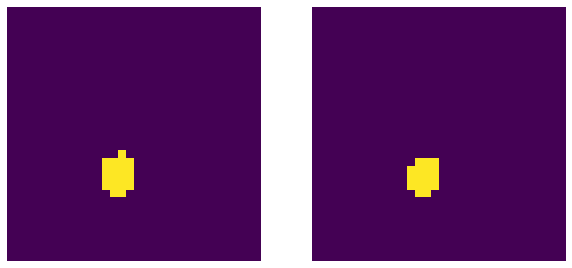

In [47]:
model = ConvSeq()
model.load_state_dict(torch.load('models/190715_113556_model.pt', map_location='cpu'))
show_diff(model=model,dataset=brats_ds, ITEM=7, SLICE=50)

![](models/190716_111819_pred.gif)![](models/190716_111819_target.gif)